<a href="https://colab.research.google.com/github/glYohanny/evaluacion_1_/blob/main/evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importa las librerías a nuestro entorno de trabajo

import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns#complemento de matplotlib.pyplot

dataframe

In [4]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",")
df.head(10)

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


en principio se realiza una divicion entre las varibles de tipo categoricas y las numericas para facilitar el analicis, ya que esto facilitara sacar las medida de tendencia central percentiles y desviacion estandar

In [ ]:
# Identificar variables categóricas y numéricas
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Imprimir los tipos de variables
print("Variables Categóricas:", categorical_vars)
print("Variables Numéricas:", numerical_vars)

Variables Categóricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Variables Numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
# Variables categóricas nominales
categorical_nominal_vars = ['JobRole', 'Department', 'BusinessTravel', 'MaritalStatus', 'Over18', 'Gender', 'OverTime', 'Attrition']

# Variables categóricas ordinales
categorical_ordinal_vars = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# Variables numéricas discretas
numerical_discrete_vars = ['NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Variables numéricas continuas
numerical_continuous_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears']

In [ ]:
analyzable_vars = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

se realiza una iteracion para analizar las diversas variables numericas de las cuales se podemos concluir que la empresa cuenta con un expectro de trabajadores entre los 18 asta los 60

ademas de que la satisfaccion de los empleado con su trabajo esta sobre la media en una escala de 1 a 4 pero su desviacion estandar esta sobre 1 lo que quiere decir que hay empleados muy satisfechos con su trabajo y otros que estan muy descontentos


In [ ]:
# Iterar sobre las variables numéricas
for var in analyzable_vars:
    # 1. Calcular estadísticas descriptivas
    descriptive_stats = df[var].describe()
    print(f"Estadísticas Descriptivas para {var}:\n", descriptive_stats,"\n")



Estadísticas Descriptivas para Age:
 count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64 

Estadísticas Descriptivas para DailyRate:
 count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64 

Estadísticas Descriptivas para DistanceFromHome:
 count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64 

Estadísticas Descriptivas para Education:
 count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64 

Estadísticas Descr

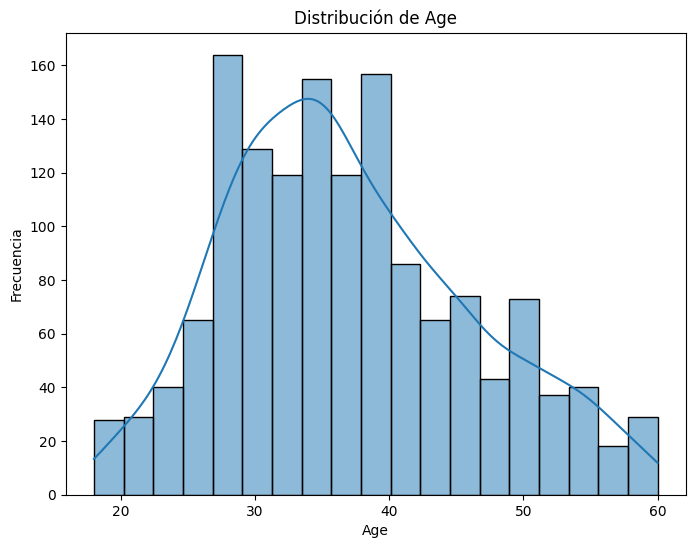

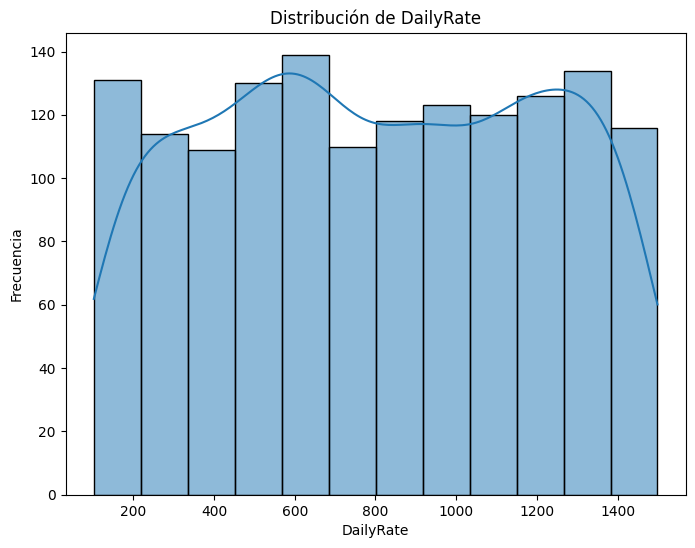

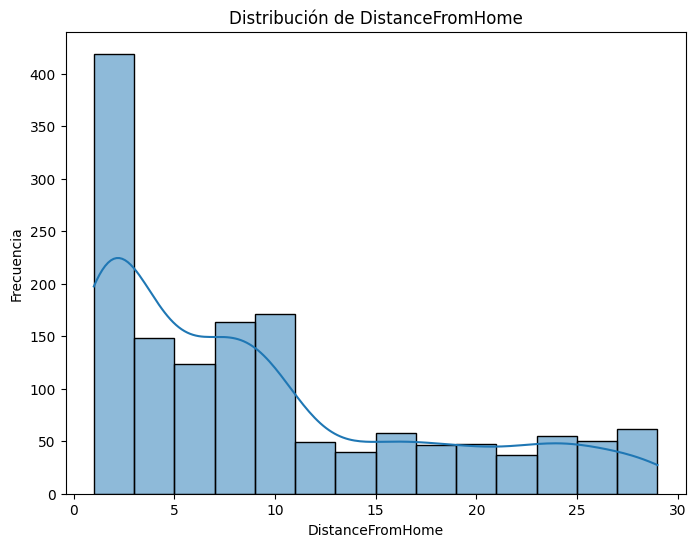

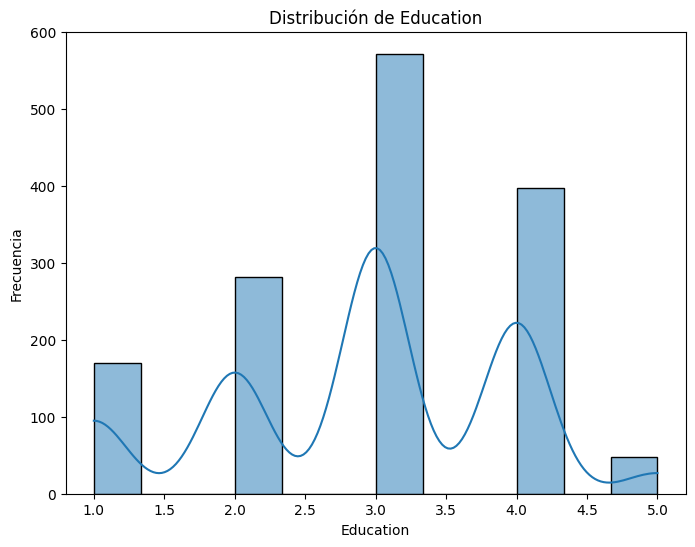

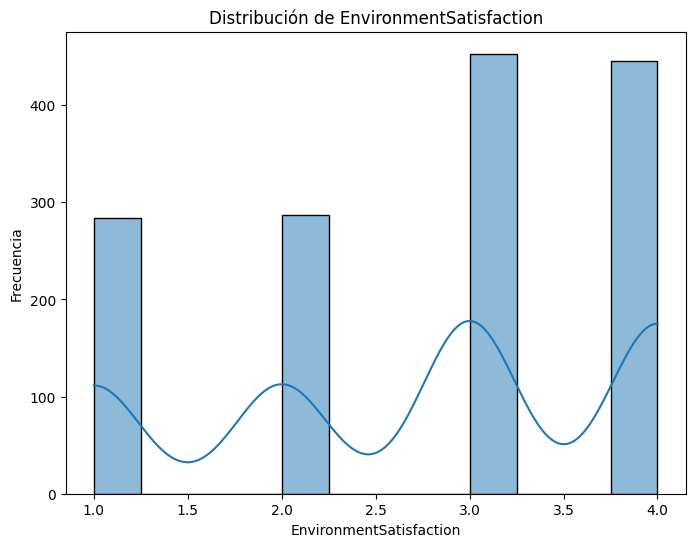

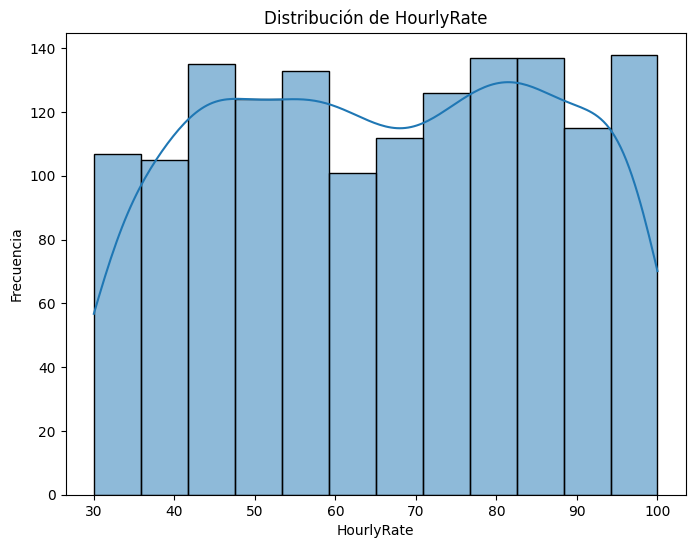

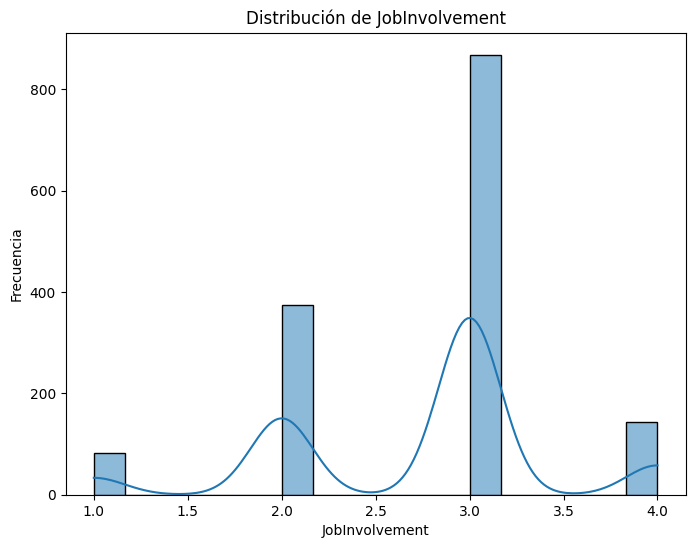

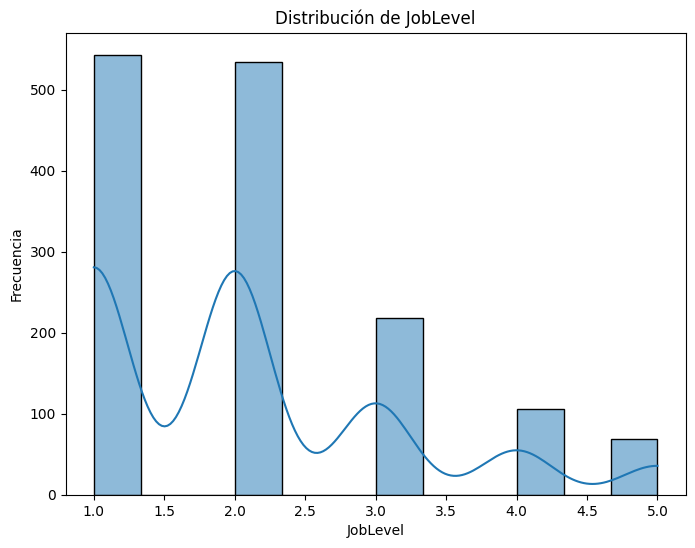

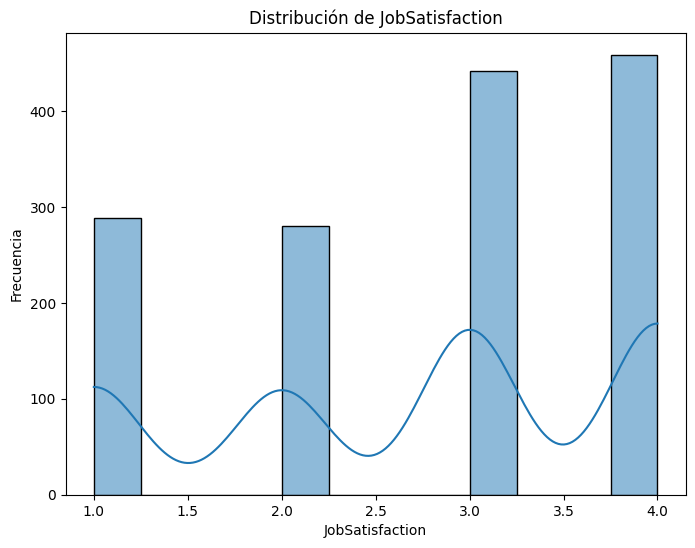

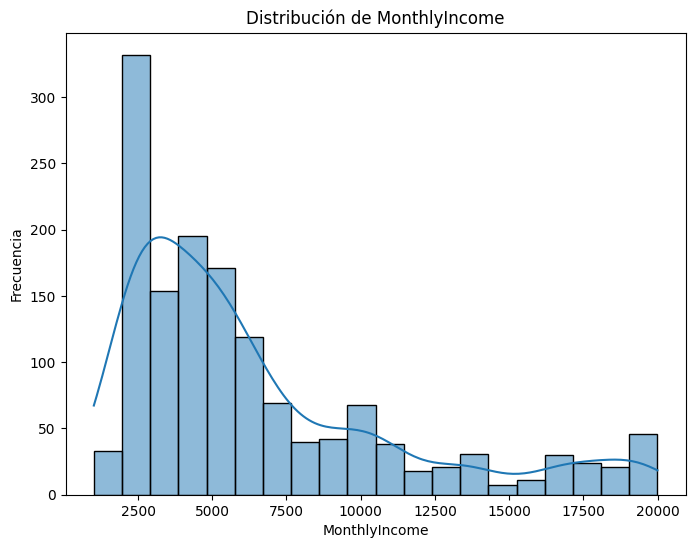

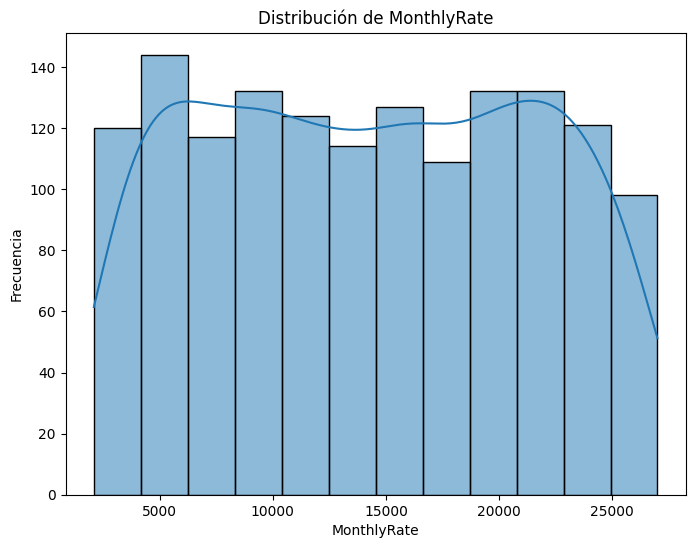

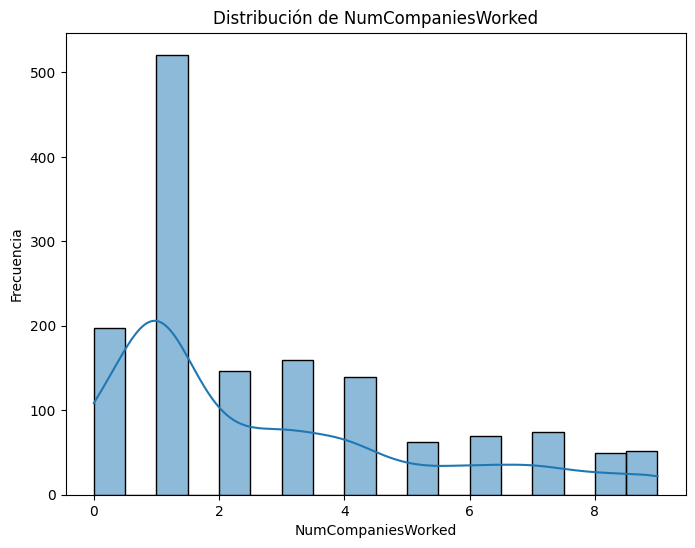

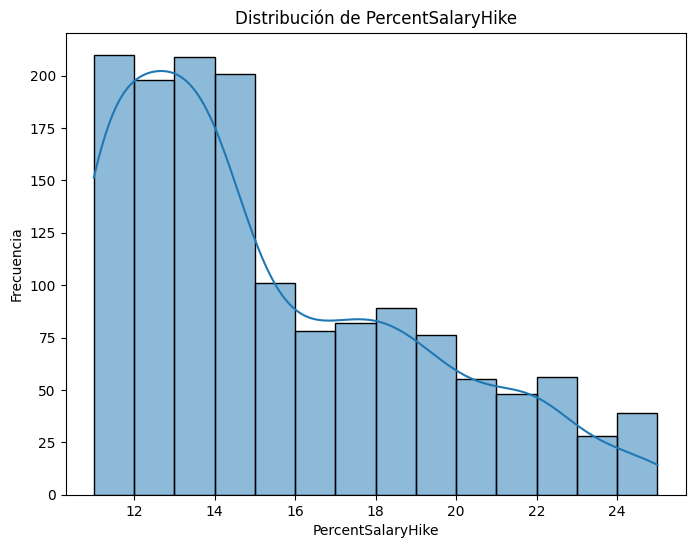

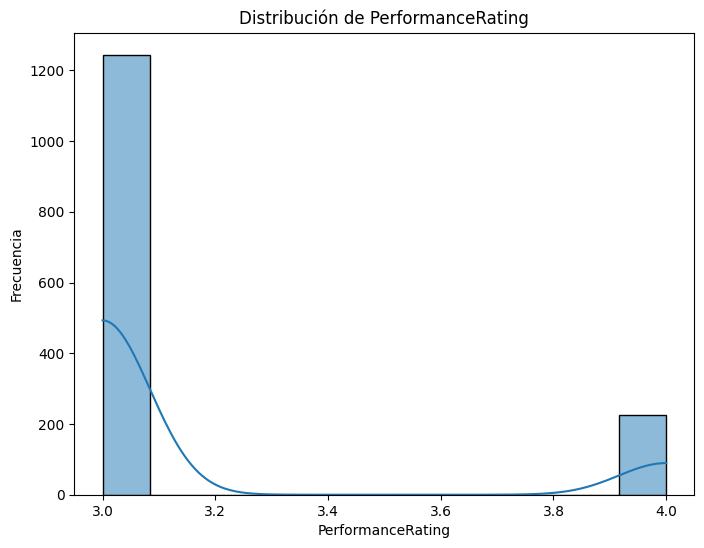

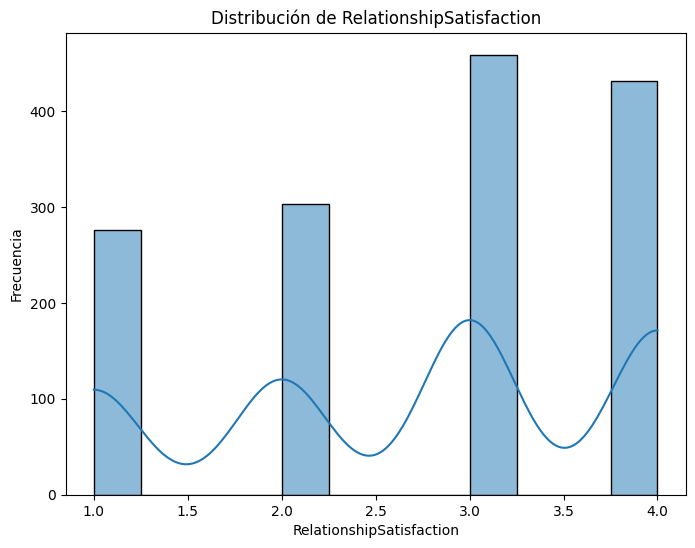

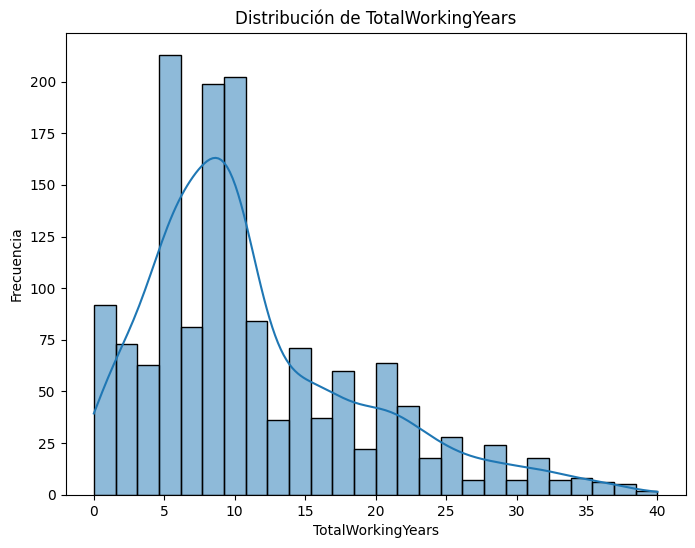

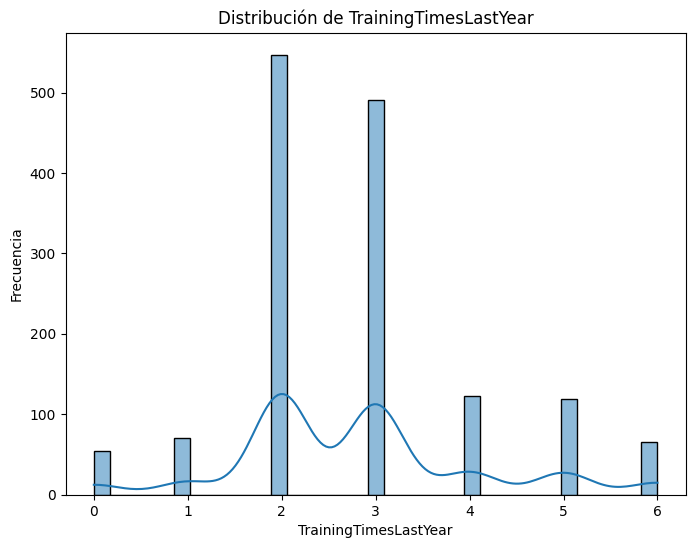

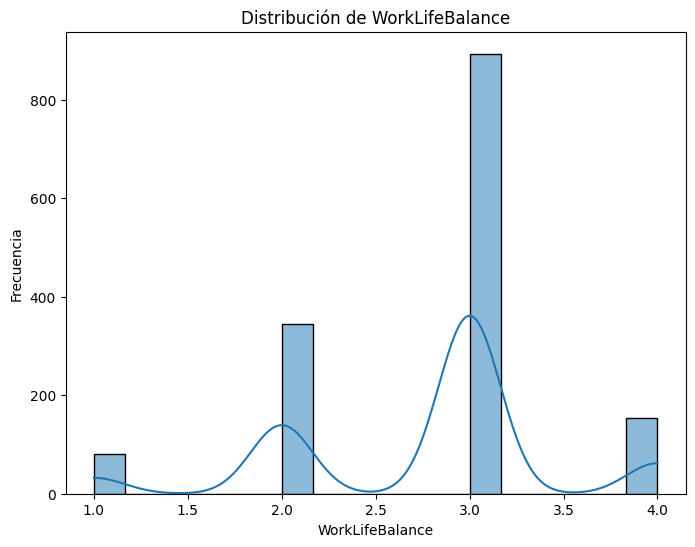

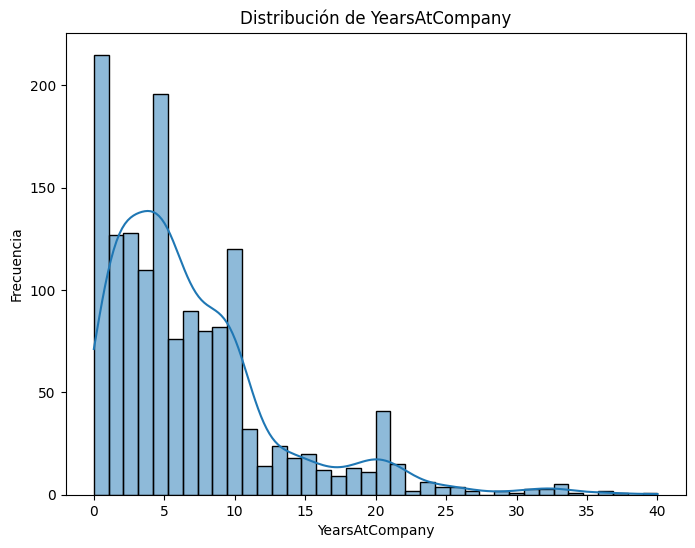

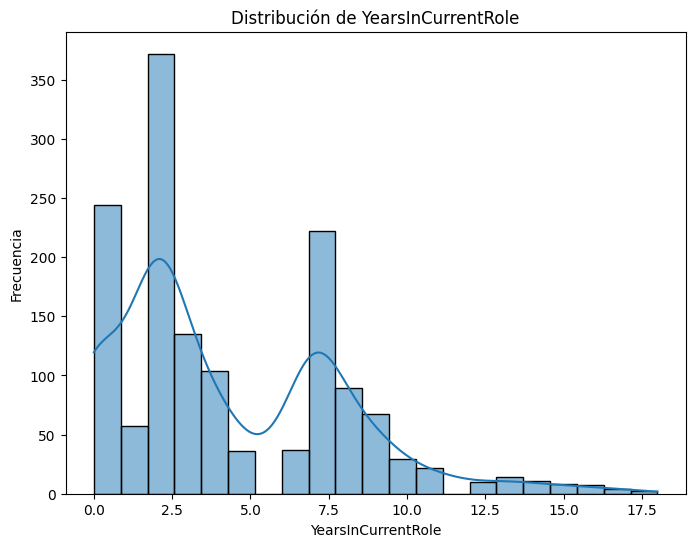

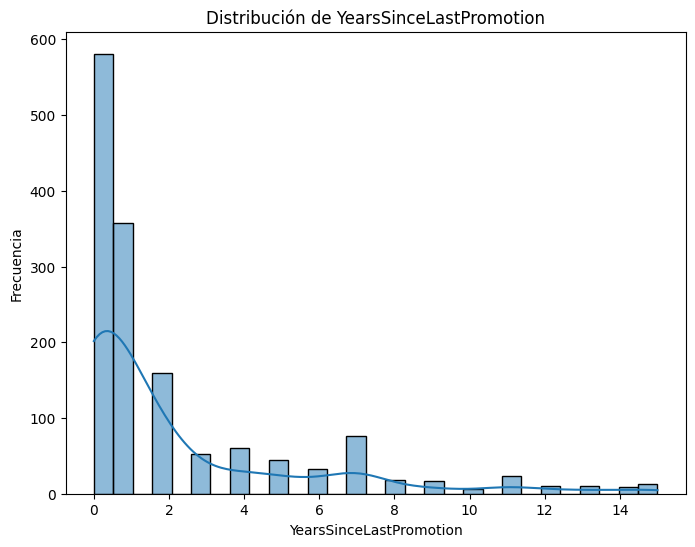

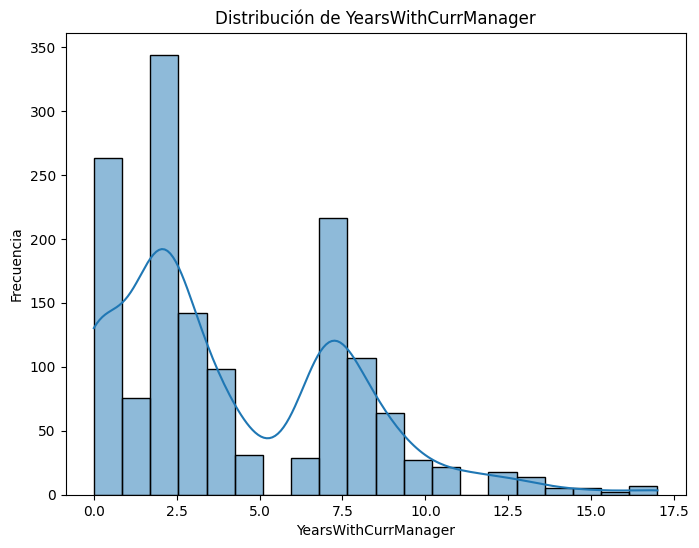

In [ ]:
for var in analyzable_vars:
  # 2. Crear histograma para analizar la distribución
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()
    print("\n")

In [ ]:
for var in analyzable_vars:
   # 3. Calcular la asimetría
    skewness = df[var].skew()
    print(f"Asimetría de {var}:", skewness)
    print("\n")

Asimetría de Age: 0.4132863018563338


Asimetría de DailyRate: -0.003518568352325854


Asimetría de DistanceFromHome: 0.9581179956568269


Asimetría de Education: -0.2896810819684331


Asimetría de EmployeeCount: 0.0


Asimetría de EmployeeNumber: 0.016574019580105036


Asimetría de EnvironmentSatisfaction: -0.32165444773937907


Asimetría de HourlyRate: -0.03231095290044942


Asimetría de JobInvolvement: -0.4984193640419493


Asimetría de JobLevel: 1.0254012829518246


Asimetría de JobSatisfaction: -0.3296719586636647


Asimetría de MonthlyIncome: 1.3698166808390662


Asimetría de MonthlyRate: 0.018577807891132458


Asimetría de NumCompaniesWorked: 1.026471111968205


Asimetría de PercentSalaryHike: 0.8211279755780908


Asimetría de PerformanceRating: 1.921882702142603


Asimetría de RelationshipSatisfaction: -0.30282756517072296


Asimetría de StandardHours: 0.0


Asimetría de StockOptionLevel: 0.9689803167738937


Asimetría de TotalWorkingYears: 1.1171718528128527


Asimetría de Tra

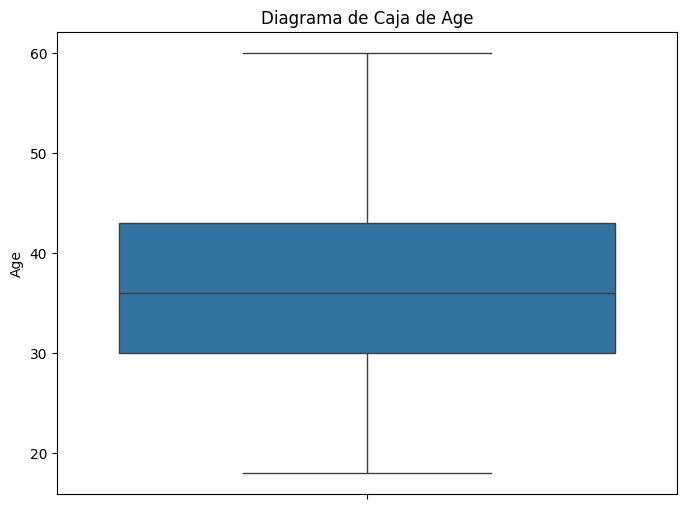

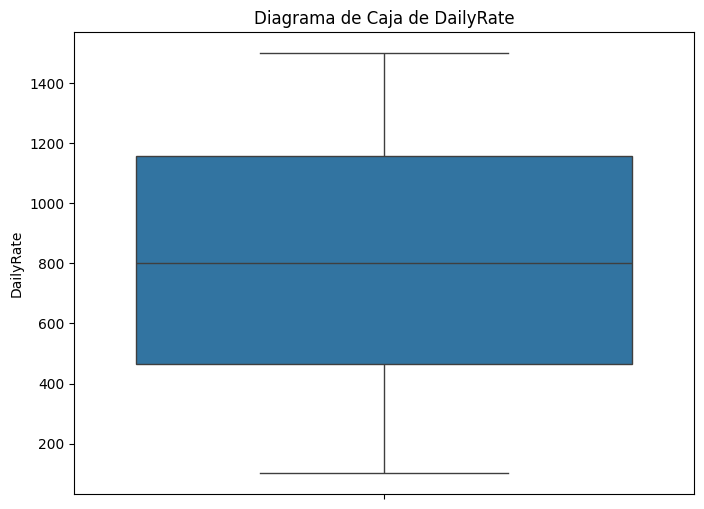

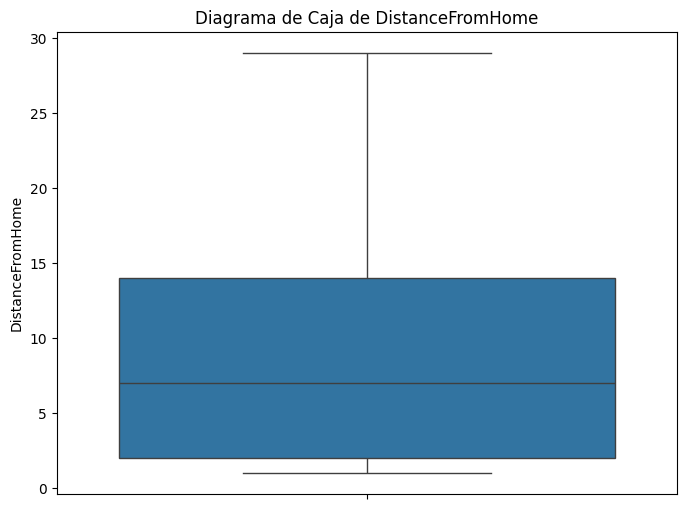

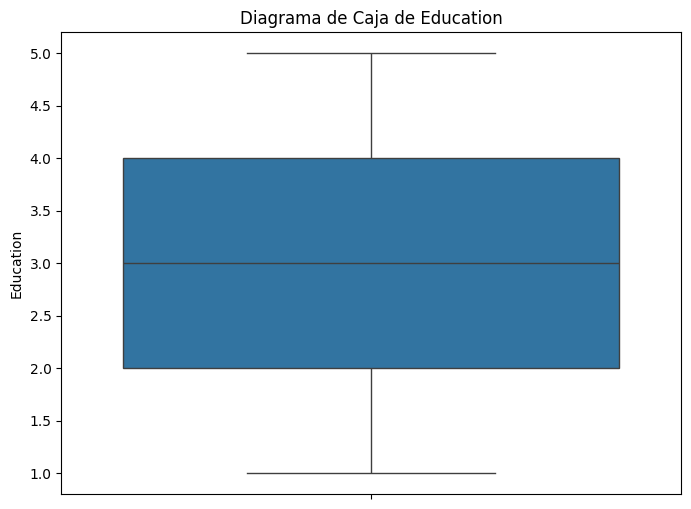

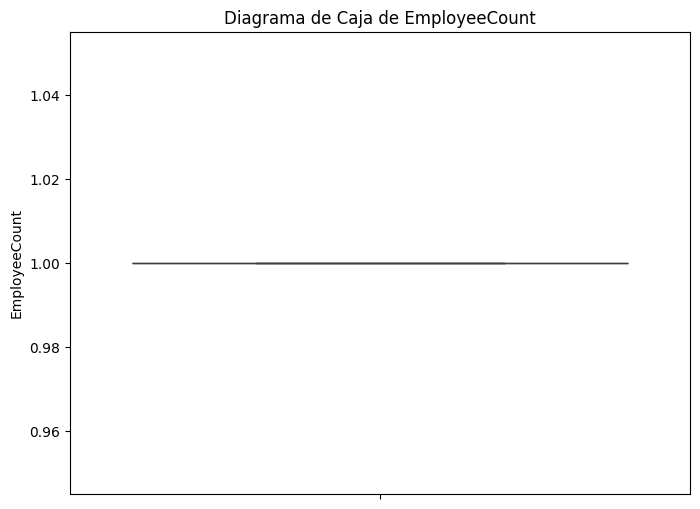

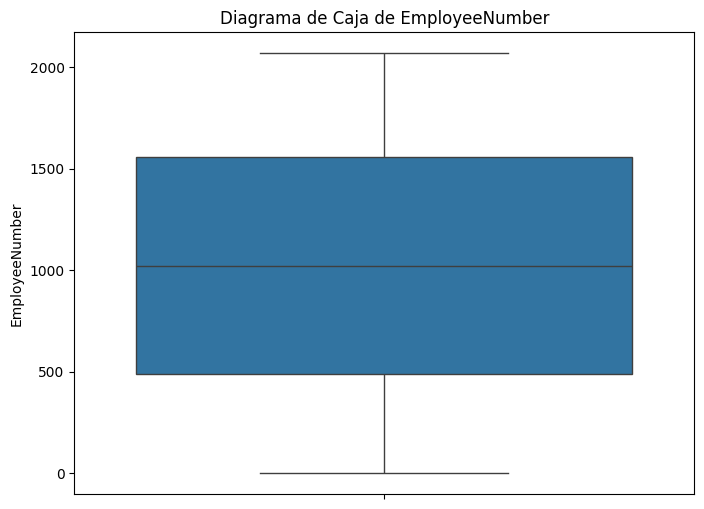

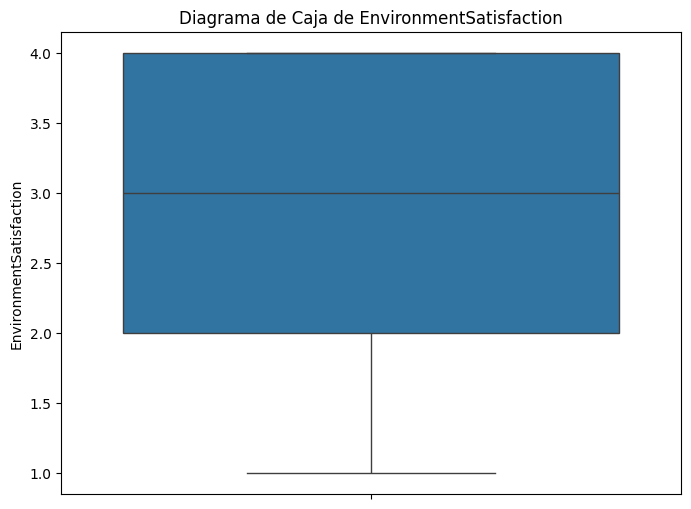

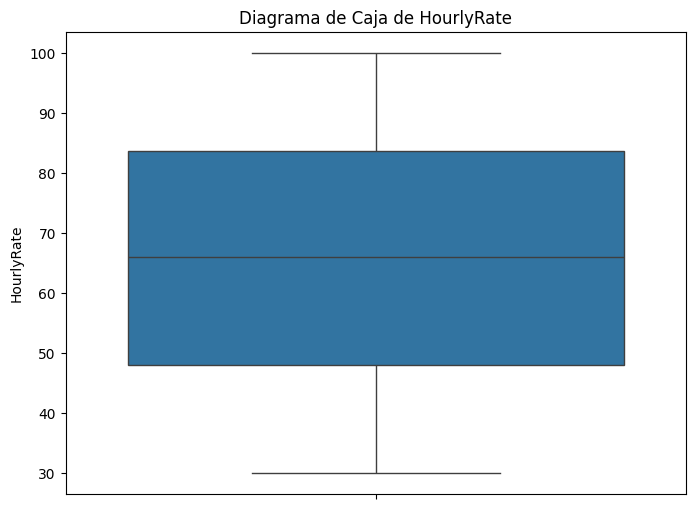

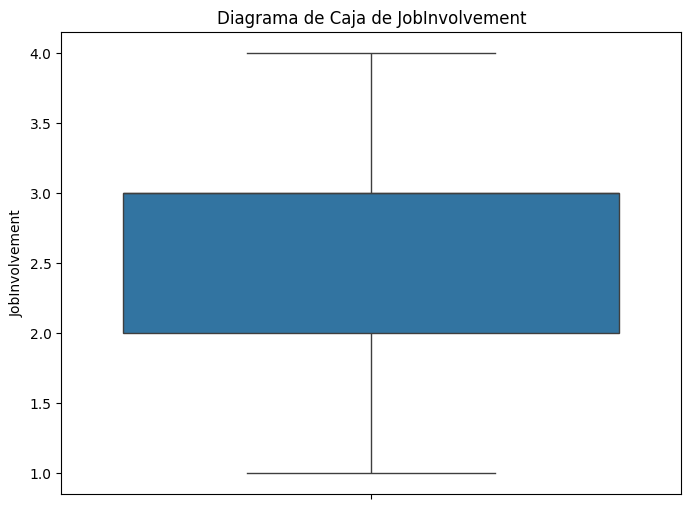

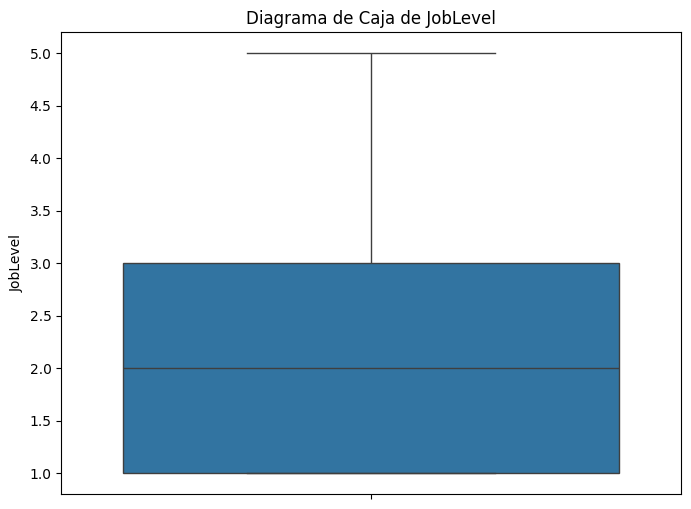

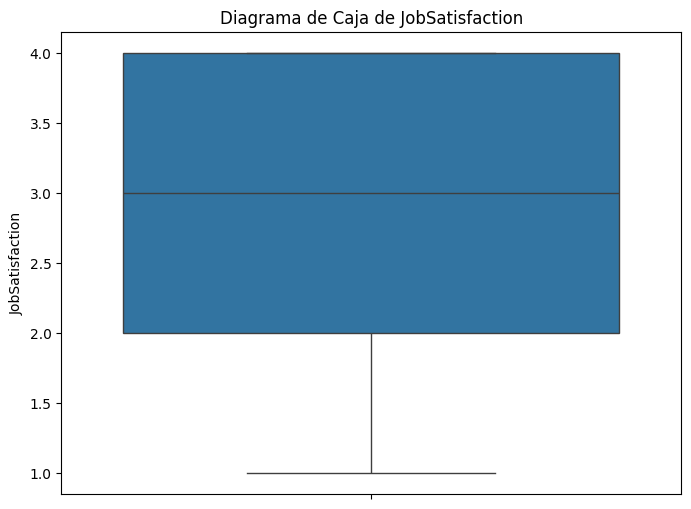

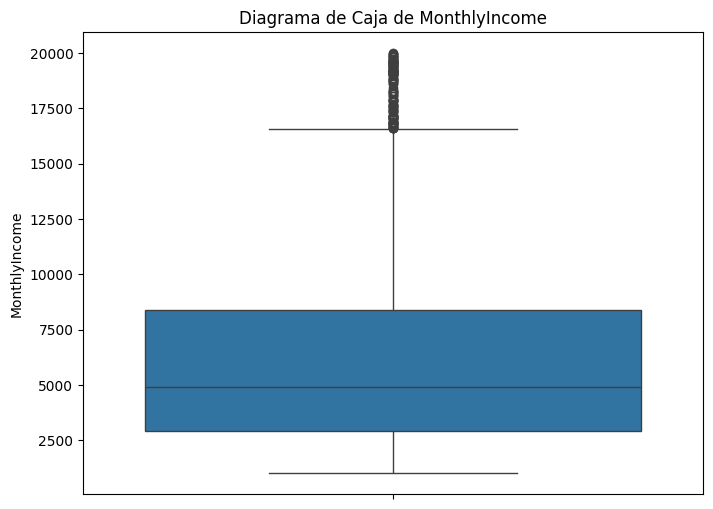

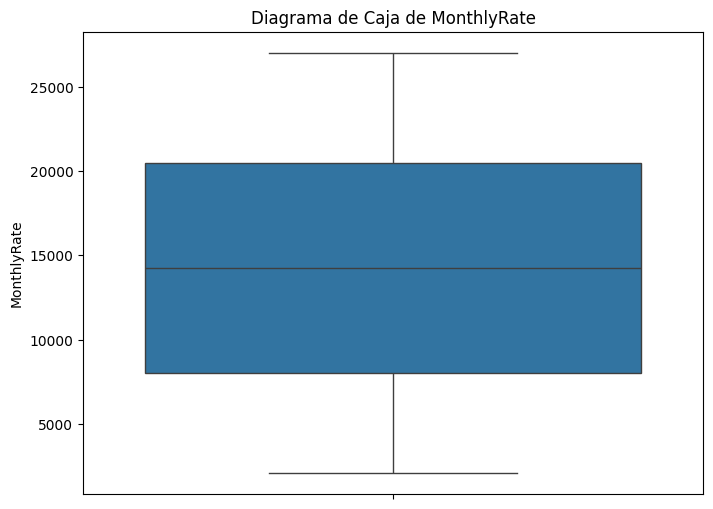

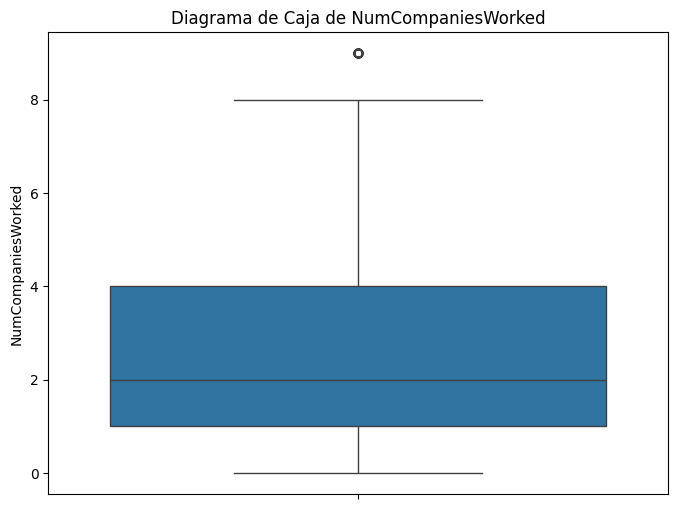

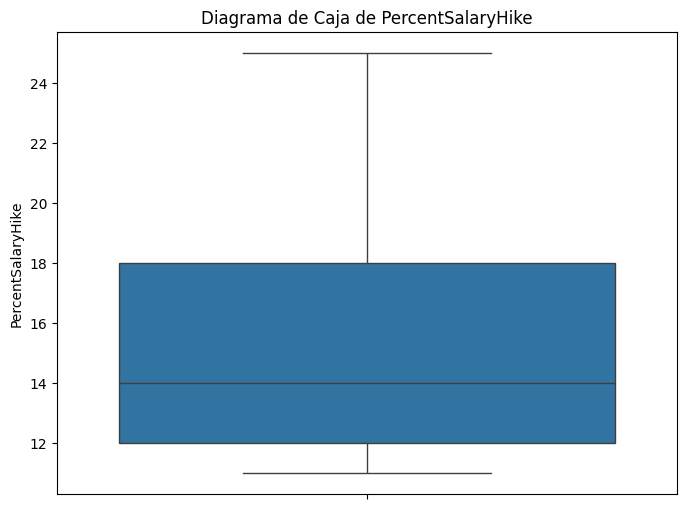

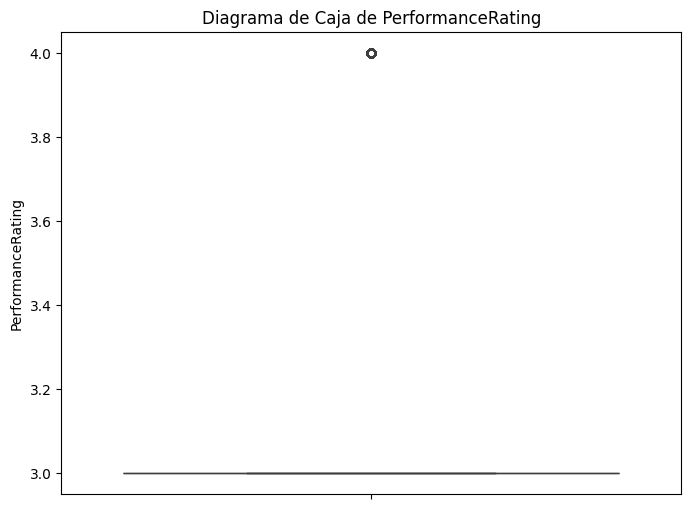

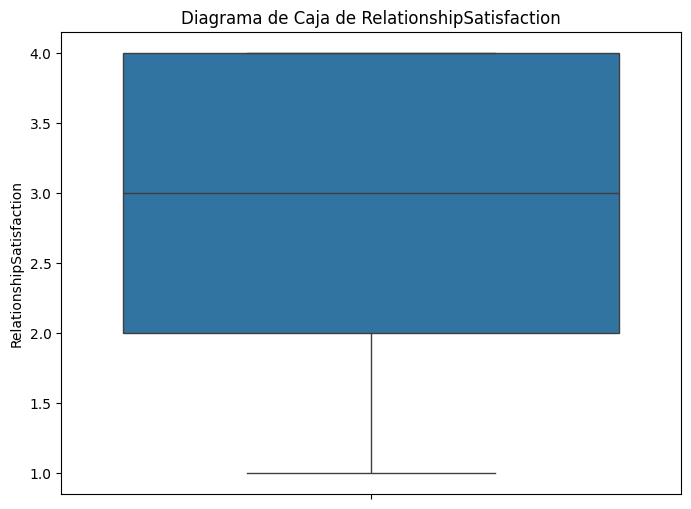

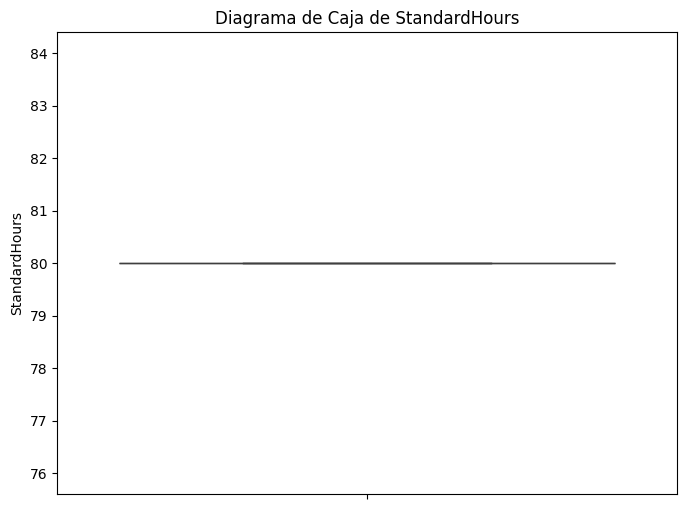

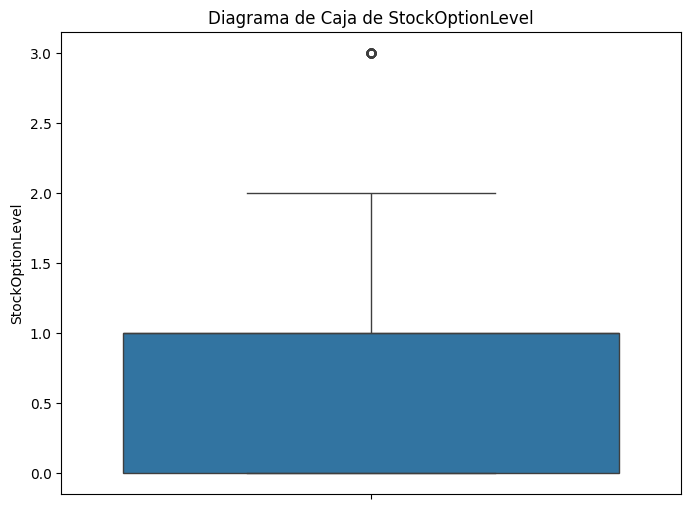

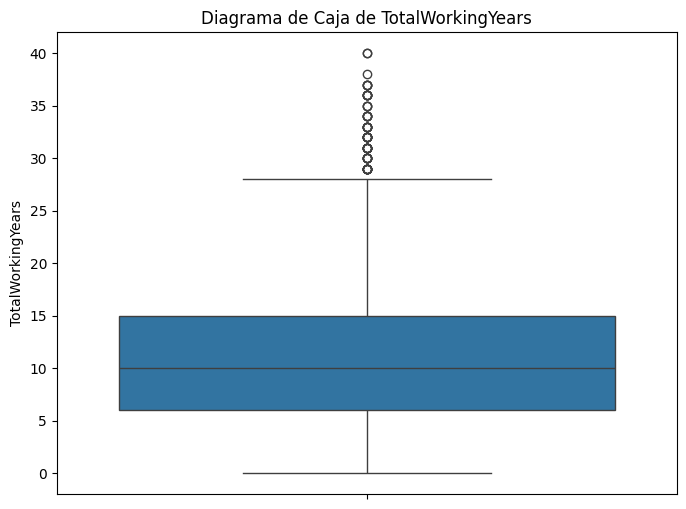

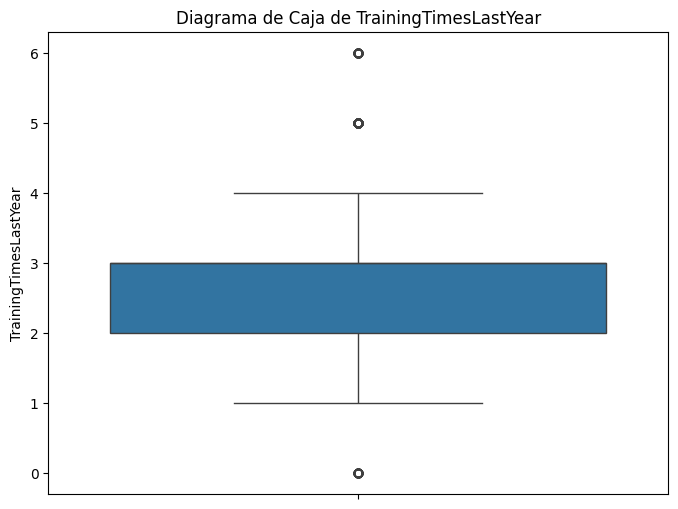

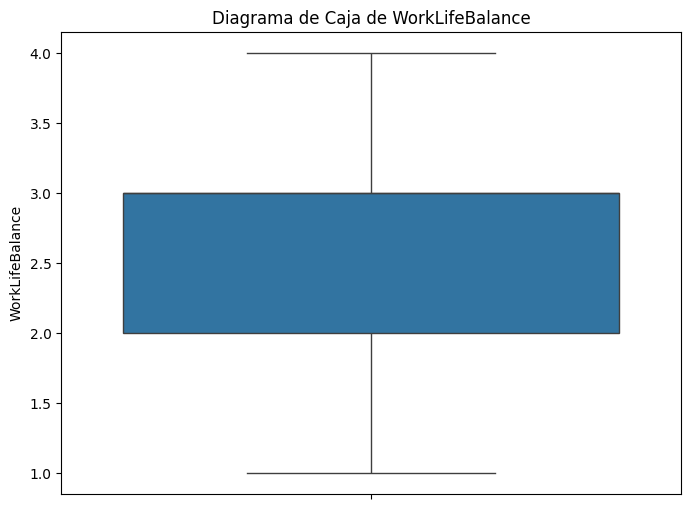

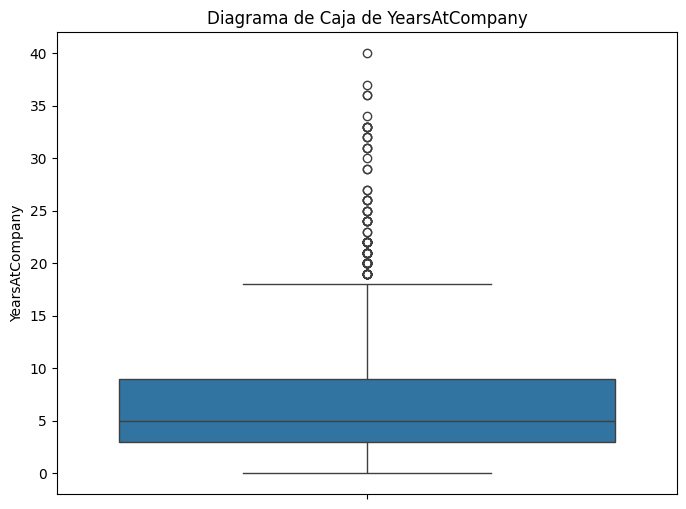

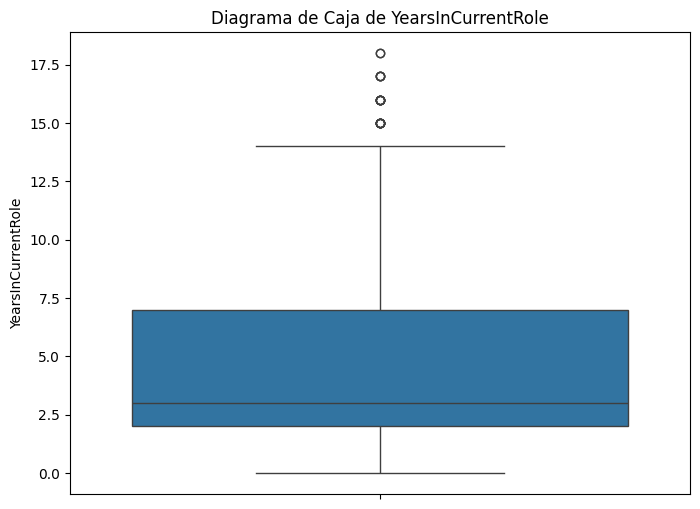

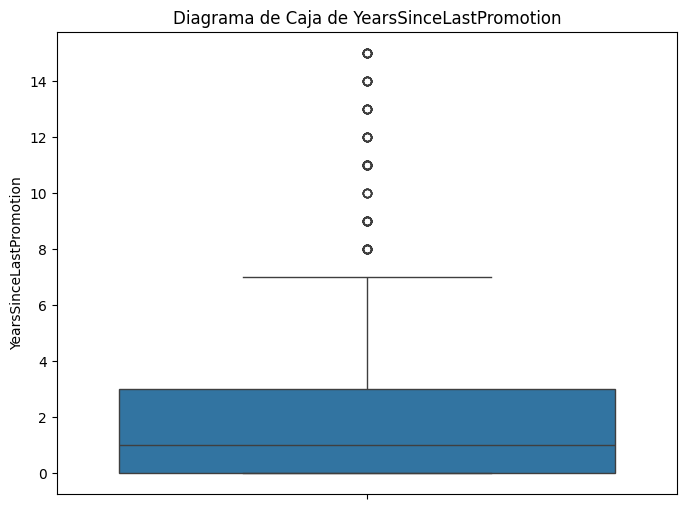

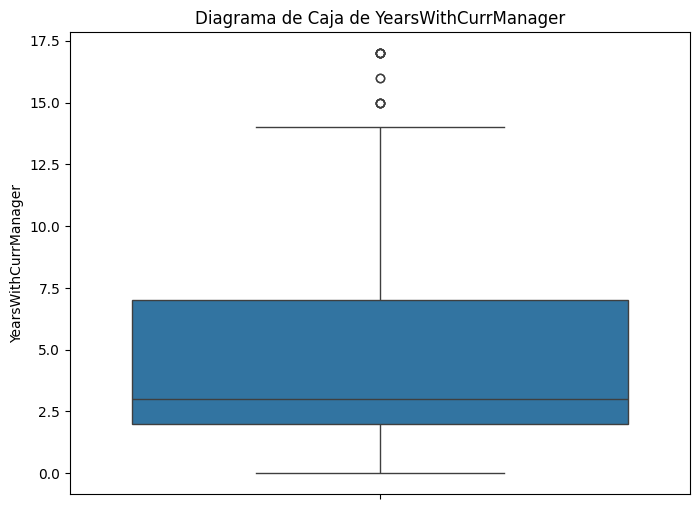

In [ ]:
for var in analyzable_vars:
# 4. Crear diagrama de caja para identificar valores atípicos
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var])
    plt.title(f'Diagrama de Caja de {var}')
    plt.ylabel(var)
    plt.show()
    print("\n")

In [ ]:
for var in analyzable_vars:
# 5. Identificar valores atípicos usando el método IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Valores atípicos para {var}:\n", outliers)
    print("-" * 30)  # Separador visual entre variables

Valores atípicos para Age:
 Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
------------------------------
Valores atípicos para DailyRate:
 Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, Num

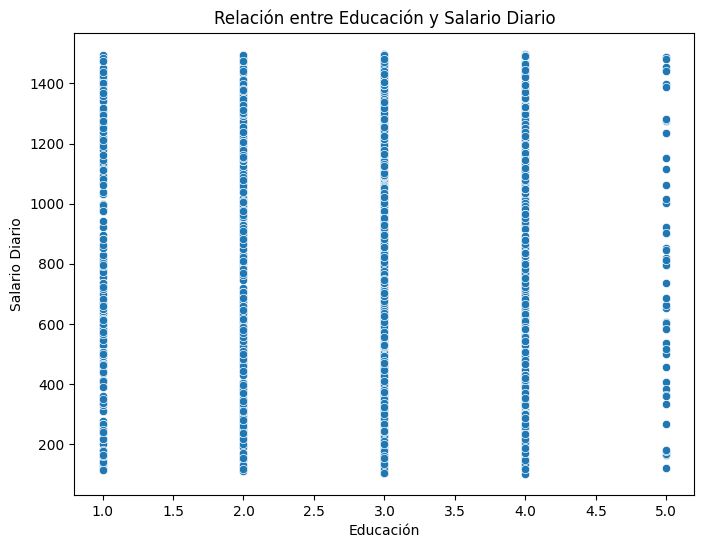

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Education', y='DailyRate', data=df)
plt.title('Relación entre Educación y Salario Diario')
plt.xlabel('Educación')
plt.ylabel('Salario Diario')
plt.show()

de este grafico se puede deducir que no hay relacion entre nivel de educacion y salario.

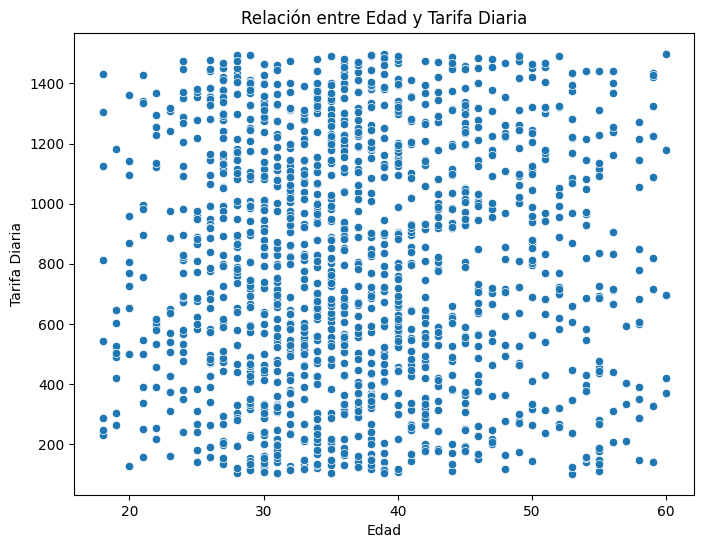

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='DailyRate', data=df)  # Cambia 'HourlyRate' por 'DailyRate'
plt.title('Relación entre Edad y Tarifa Diaria')
plt.xlabel('Edad')
plt.ylabel('Tarifa Diaria')
plt.show()

In [ ]:
correlation = df['Age'].corr(df['DailyRate'])  # Cambia 'HourlyRate' por 'DailyRate'
print(f"Coeficiente de correlación: {correlation}")

Coeficiente de correlación: 0.010660942645538182


y de esto se puede inferir que no hay relacion entre la edad y el salario diario, lo que significa que la edad no es un impedimento para tener un buen salario, ademas de que el horario estandar es de 80.

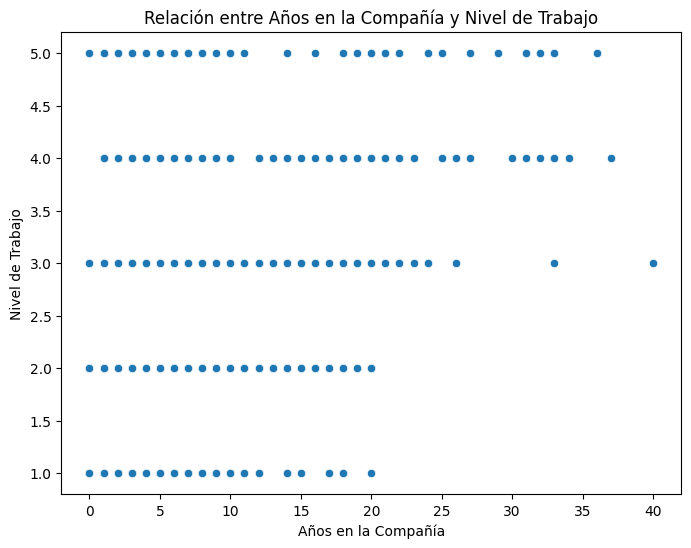

Coeficiente de correlación: 0.5347386873756295


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsAtCompany', y='JobLevel', data=df)
plt.title('Relación entre Años en la Compañía y Nivel de Trabajo')
plt.xlabel('Años en la Compañía')
plt.ylabel('Nivel de Trabajo')
plt.show()

correlation = df['YearsAtCompany'].corr(df['JobLevel'])
print(f"Coeficiente de correlación: {correlation}")

el coeficiente de relacion es debil, lo que hay realcion pero no es seguro que cuanto mas tiempo pase te asenderan.

adicional///

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64


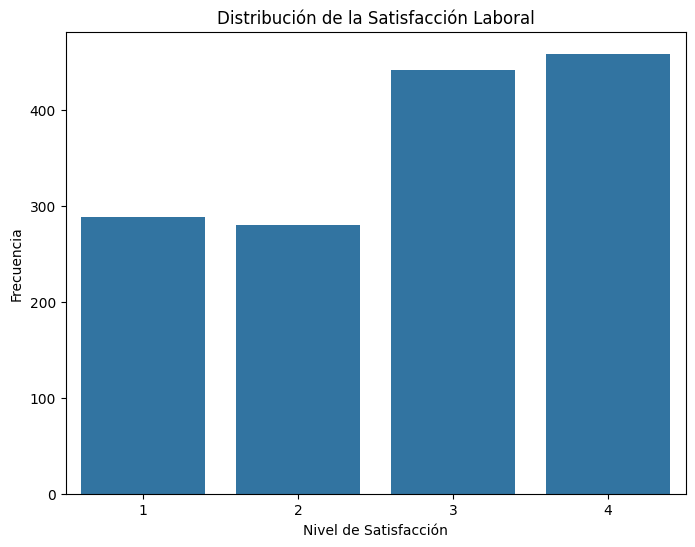

In [5]:
# Tabla de frecuencia
job_satisfaction_freq = df['JobSatisfaction'].value_counts()
print(job_satisfaction_freq)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSatisfaction', data=df)
plt.title('Distribución de la Satisfacción Laboral')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Frecuencia')
plt.show()

^

|

|

|

se muestra que los trabajadores de esta empresa estan satisfecho con su trabajo.
la diferencia es de 991 personas que dicen estar contentas y muy contenta con su trabajo,
a las 569 que dicen estar descontentos o muy descontentos con su trbajo.

                Frecuencia  Porcentaje
MonthlyIncome                         
(2000, 4000]           510   34.693878
(4000, 6000]           371   25.238095
(6000, 8000]           175   11.904762
(8000, 10000]          100    6.802721
(10000, 12000]          86    5.850340
(18000, 20000]          69    4.693878
(16000, 18000]          57    3.877551
(12000, 14000]          53    3.605442
(0, 2000]               33    2.244898
(14000, 16000]          16    1.088435




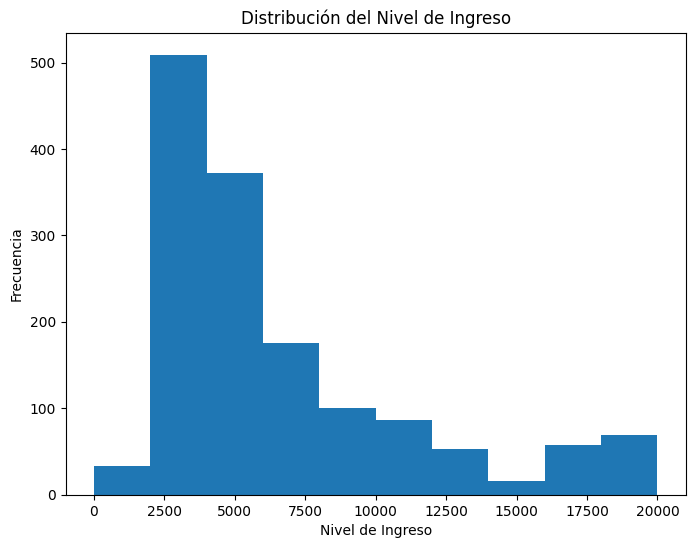

In [12]:
# Tabla de frecuencia (agrupada en intervalos)
income_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]
income_freq = pd.cut(df['MonthlyIncome'], bins=income_bins).value_counts()
income_freq_percentage = pd.cut(df['MonthlyIncome'], bins=income_bins).value_counts(normalize=True) * 100
income_table = pd.concat([income_freq, income_freq_percentage], axis=1)
income_table.columns = ['Frecuencia', 'Porcentaje']
print(income_table)
print("\n")
# Histograma
plt.figure(figsize=(8, 6))
plt.hist(df['MonthlyIncome'], bins=income_bins)
plt.title('Distribución del Nivel de Ingreso')
plt.xlabel('Nivel de Ingreso')
plt.ylabel('Frecuencia')
plt.show()

en este grafico se muestra que la gran mayoria de personas se encuentran en un rango sueldo entre los 2000 y 4000 (pd:"nose la moneda que se utiliza") dolares mensuales, siendo el 34,7% del total ademas de que en intervalo de 4000 y 6000 tiene el 25,2% teniendo haci mas del 50% del total de personas en estos intevalo, la distribucion de los ingresos esta sesgada a la derecha, esto significa que la mayoria de los empleados tienen ingresos bajos, solo al rededor del 23% recibe un sueldo superior a 6000 esto se puede deber a la competitvidad salarial o la cultura organizacional, entre otros motivos.

TotalWorkingYears
(5, 10]     607
(0, 5]      305
(10, 15]    191
(15, 20]    149
(20, 25]    109
(25, 30]     52
(30, 35]     33
(35, 40]     13
Name: count, dtype: int64


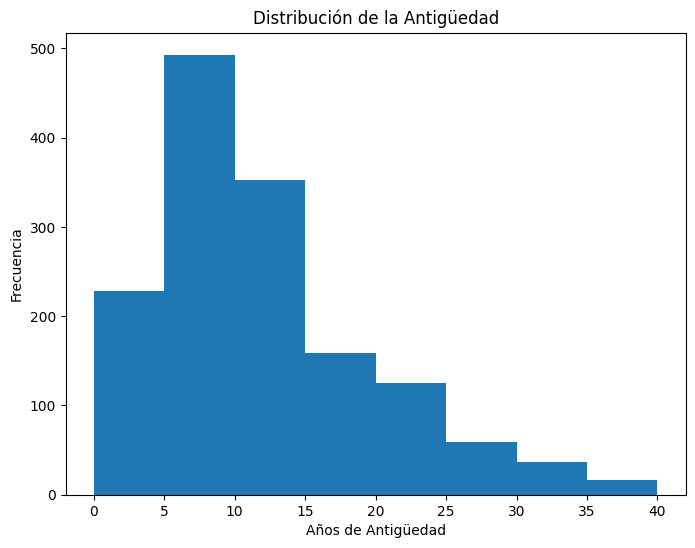

In [19]:
# Tabla de frecuencia (agrupada en intervalos)
years_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
years_freq = pd.cut(df['TotalWorkingYears'], bins=years_bins).value_counts()
print(years_freq)

# Histograma
plt.figure(figsize=(8, 6))
plt.hist(df['TotalWorkingYears'], bins=years_bins)
plt.title('Distribución de la Antigüedad')
plt.xlabel('Años de Antigüedad')
plt.ylabel('Frecuencia')
plt.show()

se muestra que la antiguedad de los trabajadores en esta empresa esta entre los 0 a 10 años teniendo en total 912 personas en ese rango de antiguedad, la alta concentracion de empleados con menos de 10 años de experiencia puede deberse a una baja rottacion de empleo en la emprezaa.

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


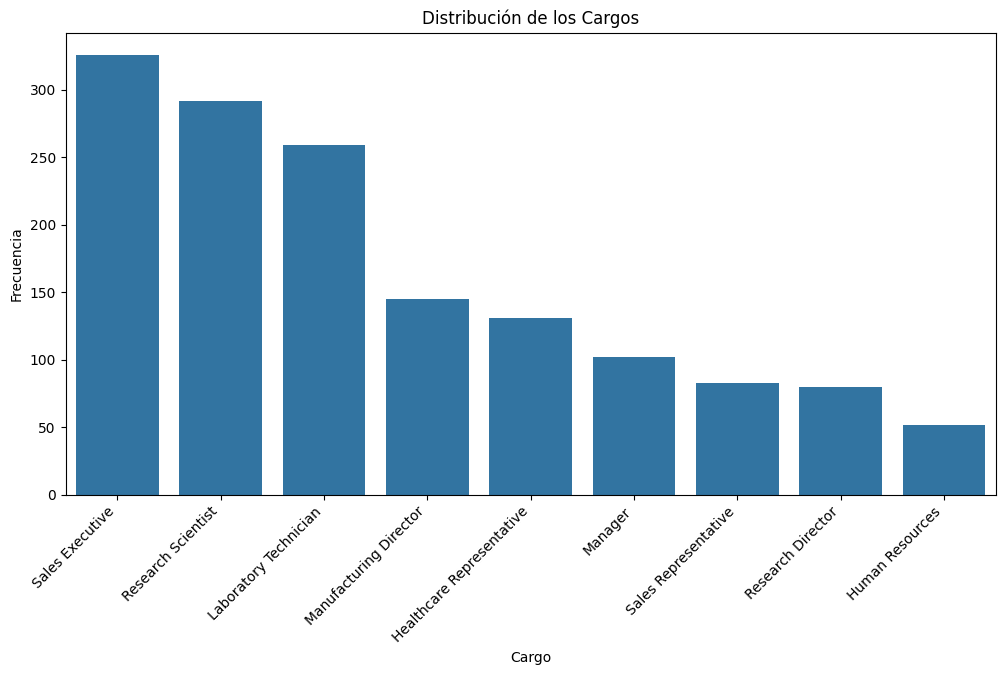

In [20]:
# Tabla de frecuencia
job_role_freq = df['JobRole'].value_counts()
print(job_role_freq)

# Gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño según la cantidad de cargos
sns.countplot(x='JobRole', data=df)
plt.title('Distribución de los Cargos')
plt.xlabel('Cargo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son muy largas
plt.show()

los roles mas comunes son:
*  Sales Executive (326)
*  Research Scientist (292)
*  Laboratory Technician (259)

esto puede sugerir que la empresa se enfoca en el area de venta, investigacion y desarroll.

el rol menos comun es Human Resources (52) esto se puede deberse a que la empresa tiene un area de recursos humano acotada.

   Education  Frecuencia  Porcentaje
0          3         572   38.911565
1          4         398   27.074830
2          2         282   19.183673
3          1         170   11.564626
4          5          48    3.265306


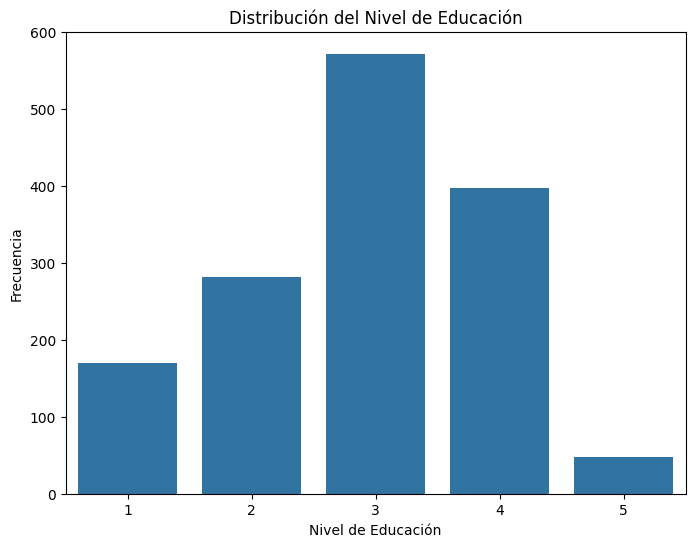

In [26]:
# Tabla de frecuencia
education_freq = df['Education'].value_counts().rename_axis('Education').reset_index(name='Frecuencia')
education_freq['Porcentaje'] = (education_freq['Frecuencia'] / education_freq['Frecuencia'].sum()) * 100
print(education_freq)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df)
plt.title('Distribución del Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.show()

mas del 60% de los empleados cuentan con un nivel medio-alto o superior de educacion de los cuales solo el 3% del total cuenta con una educacion de nivel 5, esto se puede deber al reclutamiento o a la cultura organizacional.

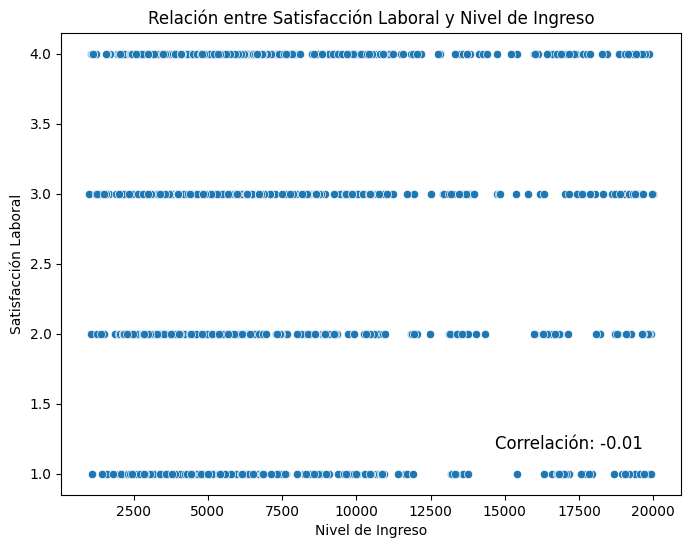

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyIncome', y='JobSatisfaction', data=df)
plt.title('Relación entre Satisfacción Laboral y Nivel de Ingreso')
plt.xlabel('Nivel de Ingreso')
plt.ylabel('Satisfacción Laboral')

correlation = df['JobSatisfaction'].corr(df['MonthlyIncome'])
plt.text(0.7, 0.1, f'Correlación: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

en este grafico se muestra la relacion entre sueldo y satifaccion laboral, muestra la relacion es practicamente inexistente, por ende hay otros factores que afectan a la satisfacion de los trabajadores ademas del sueldo

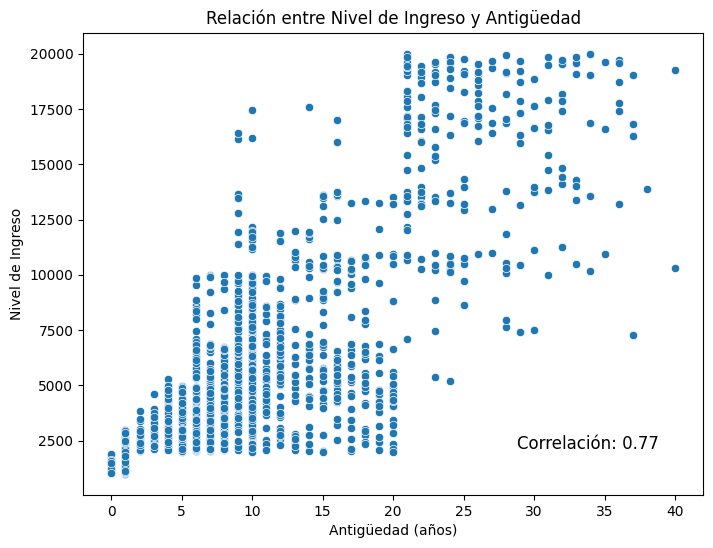

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)
plt.title('Relación entre Nivel de Ingreso y Antigüedad')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Nivel de Ingreso')

correlation = df['TotalWorkingYears'].corr(df['MonthlyIncome'])
plt.text(0.7, 0.1, f'Correlación: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

este grafico muestra que entre nivel de ingreso y antiguedad hay una relacion fuerte, lineal hacendente quiere decir que cuanto mas antiwedad tengas en la empresa mas dinero se gana, esto puede deberce a una buena estructura salarial o ascensos y promociones lo que permite que los empleados con mas antiguedad y experiecia escalen en salario

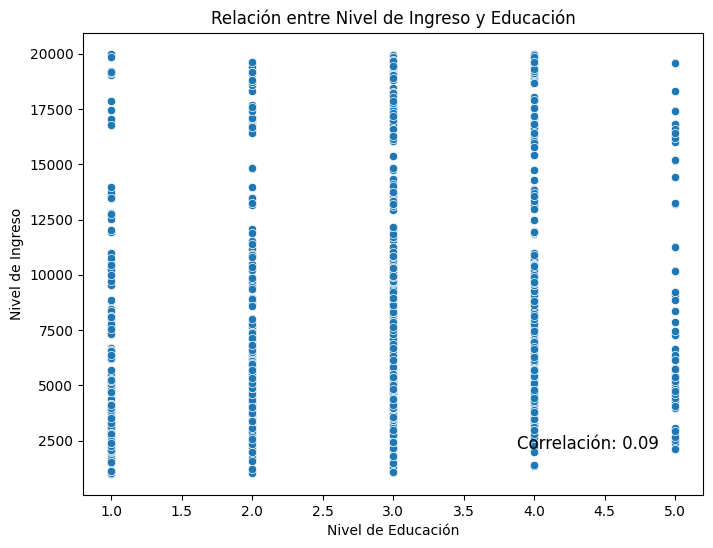

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Education', y='MonthlyIncome', data=df)
plt.title('Relación entre Nivel de Ingreso y Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Nivel de Ingreso')

correlation = df['Education'].corr(df['MonthlyIncome'])
plt.text(0.7, 0.1, f'Correlación: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

en este se muestra que los ingresos y el nivel de educacion practicamente no tiene relacion, lo que quiere decir que hay otros factores como la antigüedad, que influyen mas que el nivel de educacion

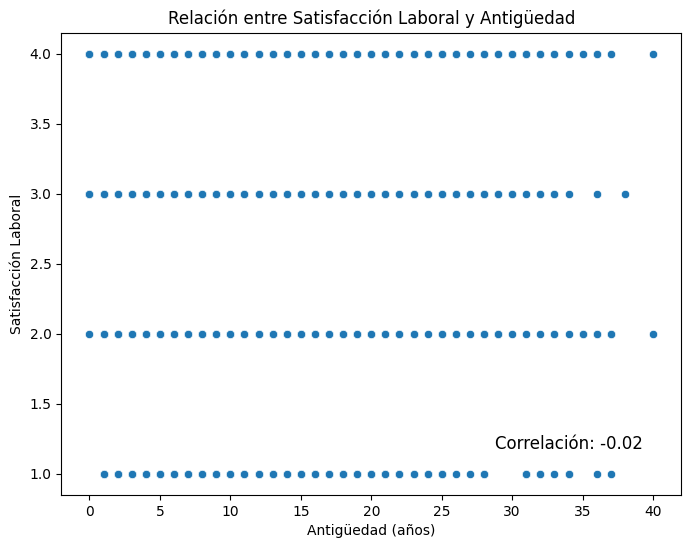

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalWorkingYears', y='JobSatisfaction', data=df)
plt.title('Relación entre Satisfacción Laboral y Antigüedad')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Satisfacción Laboral')

correlation = df['JobSatisfaction'].corr(df['TotalWorkingYears'])
plt.text(0.7, 0.1, f'Correlación: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.show()

practicamente no existe relacion entre estas dos variables, esto puede deberces a otros factores mas influyentes.

El análisis del conjunto de datos de empleados revela tendencias clave:

Satisfacción laboral: Predomina un nivel de satisfacción de 3 o 4, lo que refleja un ambiente laboral generalmente positivo.

Ingreso: La mayoría de los sueldos se concentran entre 2000 y 6000, con cierta desigualdad, pero en general, la compensación es competitiva.

Antigüedad: La fuerza laboral es mayormente joven (menos de 10 años de experiencia), con una buena presencia de empleados más experimentados.

Cargo: Los puestos más comunes son Sales Executive, Research Scientist y Laboratory Technician, lo que evidencia un enfoque en ventas e I+D. Recursos Humanos tiene poca representación.

Educación: Predomina un nivel educativo medio-alto o superior, lo que indica una plantilla calificada y con acceso a mejores puestos.